# Singapore House Sales Analysis

In [1]:
import os
import gc

os.chdir('../../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Import the Dataset

In [4]:
file_path = 'week_2/data/raw/sg-resale-flat-prices-2017-onwards.csv'
df = pd.read_csv(file_path)

## Display the Dataset's Size and Information

In [5]:
print(f"Dataset Size: {df.shape}")
df.info()

Dataset Size: (181262, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181262 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                181262 non-null  object 
 1   town                 181262 non-null  object 
 2   flat_type            181262 non-null  object 
 3   block                181262 non-null  object 
 4   street_name          181262 non-null  object 
 5   storey_range         181262 non-null  object 
 6   floor_area_sqm       181262 non-null  float64
 7   flat_model           181262 non-null  object 
 8   lease_commence_date  181262 non-null  int64  
 9   remaining_lease      181262 non-null  object 
 10  resale_price         181262 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.2+ MB


## Determine the Minimum and Maximum Values of `PublishDate`

In [6]:
df['month'] = pd.to_datetime(df['month'], errors='coerce')
min_date = df['month'].min()
max_date = df['month'].max()
print(f"Minimum transcation data: {min_date}")
print(f"Maximum transcation data: {max_date}")

Minimum transcation data: 2017-01-01 00:00:00
Maximum transcation data: 2024-06-01 00:00:00


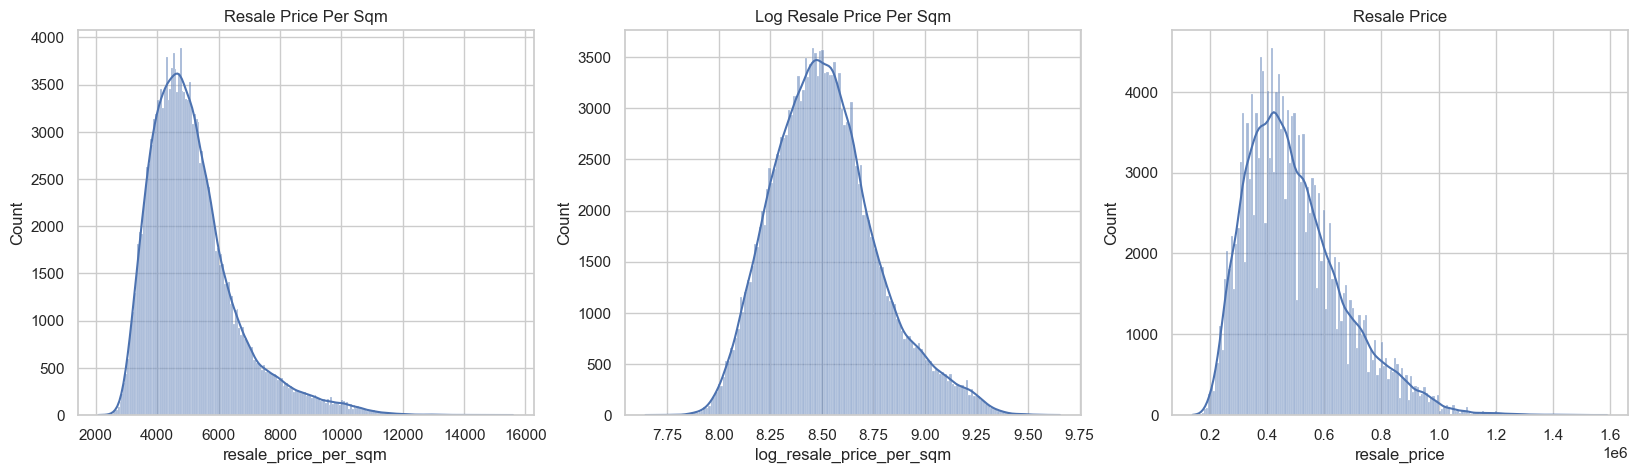

In [8]:
## Create resell price per sqm

df['resale_price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

## Create the log resell price per sqm

df['log_resale_price_per_sqm'] = np.log(df['resale_price_per_sqm'])

## Plot the distribution of resale price per sqm, the logo resale price per sqm and the original resale price using seaborn

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df['resale_price_per_sqm'], kde=True, ax=ax[0])
ax[0].set_title('Resale Price Per Sqm')

sns.histplot(df['log_resale_price_per_sqm'], kde=True, ax=ax[1])
ax[1].set_title('Log Resale Price Per Sqm')

sns.histplot(df['resale_price'], kde=True, ax=ax[2])
ax[2].set_title('Resale Price')

plt.show()